<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/Two_body_HO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
import math

from scipy import optimize
from scipy.integrate import quad, quadrature

In [ ]:
def φn(r2, n):
    return 2*np.exp(-r2/2)*ss.assoc_laguerre(r2,n,1/2) / ( np.pi**.25*np.sqrt(ss.assoc_laguerre(0,n,1/2)) )

In [ ]:
def φn2(r2, n):
    return np.exp(-r2/2)*ss.assoc_laguerre(r2,n,1/2) / ( np.pi**(3/4)*np.sqrt(ss.assoc_laguerre(0,n,1/2))**(1/2) )

In [ ]:
def φn_orth(r2, n, m):
  return φn2(r2, n)*φn2(r2, m)*r2

In [ ]:
quad(φn_orth, 0, np.inf, args=(1, 1), limit=200)

(0.3299226101861592, 4.0531916238786444e-10)

In [ ]:
quad(φn_orth, 0, np.inf, args=(1, 0), limit=200)

(-0.0811376416874166, 9.451579485764375e-09)

In [ ]:
def Vint(r,R,k0):
    return -k0**2*np.heaviside(R-r,0.5)

In [ ]:
nmax = 80
Nr = 1000

k0=100
R=.05

rmax = 1.1*R
rr, dr = np.linspace(0,rmax,Nr,endpoint=True, retstep=True)
r2 = rr**2

In [ ]:
def int_func(r, n, m, R, k0):
  return φn(r**2, n)*φn(r**2, m)*Vint(r, R, k0)*r**2

In [ ]:
def get_Hrel(nmax,R,k0):

    Hrel = np.zeros([nmax,nmax])

    for n in range(nmax):
        Hrel[n,n] = 2*n+1.5 + quadrature(int_func, 0, R, args=(n, n, R, k0))[0]

    for n in range(nmax):
        for m in range(n+1,nmax):
            Hrel[n,m] = quadrature(int_func, 0, R, args=(n, m, R, k0))[0]
            Hrel[m,n] = Hrel[n,m]
    return Hrel

In [ ]:
def get_Hrel2(nmax,R,k0):

    Hrel = np.zeros([nmax,nmax])

    for n in range(nmax):
        Hrel[n,n] = 2*n+1.5 + quad(int_func, 0, np.inf, args=(n, n, R, k0), limit=200)[0]

    for n in range(nmax):
        for m in range(n+1,nmax):
            Hrel[n,m] = quad(int_func, 0, np.inf, args=(n, m, R, k0), limit=200)[0]
            Hrel[m,n] = Hrel[n,m]
    return Hrel

CPU times: user 51.7 s, sys: 46.6 ms, total: 51.8 s
Wall time: 51.8 s


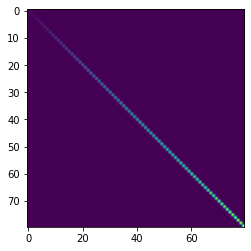

In [ ]:
%%time
Hrel2 = get_Hrel2(nmax,R,k0)
plt.imshow(Hrel2)

CPU times: user 1.17 s, sys: 2.96 ms, total: 1.18 s
Wall time: 1.18 s


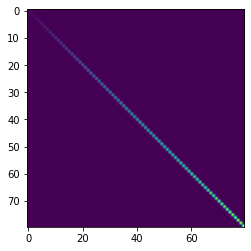

In [ ]:
%%time
Hrel = get_Hrel(nmax,R,k0)
plt.imshow(Hrel)

Maksimum virgülden sonra doğruluk:  11.0
Minimum virgülden sonra doğruluk:  10.0


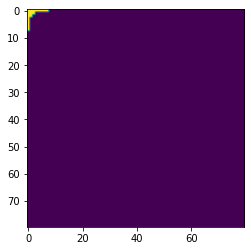

In [ ]:
err = np.abs(np.floor(np.log10(Hrel-Hrel2)))
plt.imshow(err)
print("Maksimum virgülden sonra doğruluk: ", np.max(err))
print("Minimum virgülden sonra doğruluk: ", np.min(err))

In [ ]:
def get_a0(R,k0):
    #k0R=np.sqrt(V0)*R
    k0R=k0*R
    return R*(1-np.tan(k0R)/k0R)

In [ ]:
k0 = optimize.fsolve(lambda k0: get_a0(R,k0)-1, np.pi/(2*R/1.1))[0]

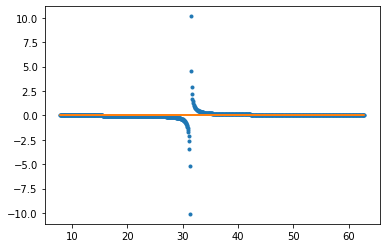

In [ ]:
k0star=np.pi/(2*R)
Na0 = 400
k0list = np.linspace(k0star*1.002,k0star*2,Na0)
k0list = np.array ([*k0list, *np.linspace(k0star/4,k0star*.998,Na0)])
a0list = get_a0(R,k0list)

plt.plot(k0list,a0list,'.')
plt.plot(k0list,0*a0list)

In [ ]:
%%time
res = []
for k0 in k0list:
    Hrel = get_Hrel(nmax,R,k0)
    ee, uu = np.linalg.eigh(Hrel)
    res.append(ee)
    
all_eigs = np.array(res)

CPU times: user 15min 43s, sys: 1min 26s, total: 17min 9s
Wall time: 15min 36s


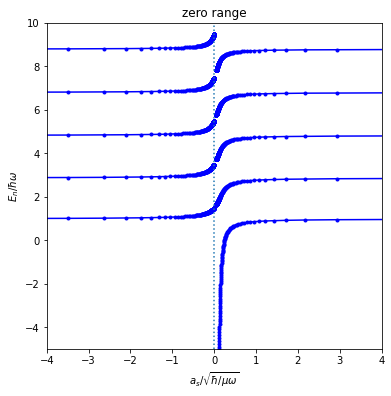

In [ ]:
plt.figure(figsize=(6,6))
isplit = len(a0list)//2
for i in range(5):
    plt.plot(a0list[:isplit],all_eigs[:isplit,i],'b.-');
    plt.plot(a0list[isplit:],all_eigs[isplit:,i],'b.-');
    
#plt.plot(a0list,scatter.r_0_W(k0list*R)*R,'r--', label=r"$r_0$");

plt.xlim([-4,4])
plt.ylim([-5,10])
plt.xlabel(r"$a_s/\sqrt{\hbar/\mu\omega}$")
plt.ylabel(r"$E_n/\hbar\omega$")
plt.title("zero range")
plt.axvline(0,ls=':');
#plt.legend(loc=4);